In [1]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *
import timm

In [2]:
!nvidia-smi

Tue Mar  2 10:10:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
| 45%   83C    P2   160W / 250W |  10919MiB / 10989MiB |     53%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 30%   45C    P8    15W / 250W |    165MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
import torch
torch.cuda.set_device(2)

In [4]:
path = Path('datasetPrueba/')
trainPath = path/'train'
testPath = path/'test'

In [5]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = [Resize(presize)],
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=180,pad_mode=PadMode.Zeros), Normalize.from_stats(*imagenet_stats)])

In [6]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [7]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='efficientnet_b3'),
    MixUp(),
]

In [8]:
learn = timm_learner(dls512, 'efficientnet_b3',cbs = callbacks,metrics=[accuracy,Precision(),Recall()]).to_fp16()

In [9]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.109158,0.632770,0.704285,0.775791,0.632997,00:34


Better model found at epoch 0 with valid_loss value: 0.6327701210975647.


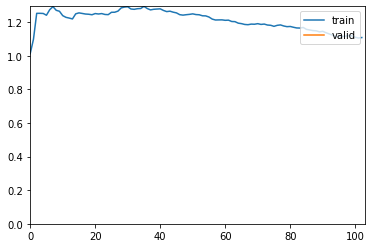

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.014431,0.597245,0.719372,0.770305,0.681257,00:41
1,1.011338,0.592155,0.725407,0.771820,0.694725,00:57
2,0.988868,0.576175,0.719372,0.760391,0.698092,00:41
3,0.945807,0.582236,0.733253,0.795007,0.679012,00:41
4,0.962906,0.583935,0.726011,0.801379,0.652076,00:52
5,0.951871,0.550770,0.741098,0.774347,0.731762,00:45
6,0.934545,0.558987,0.719372,0.775907,0.672278,00:41
7,0.907387,0.540324,0.743512,0.790524,0.711560,00:41
8,0.893749,0.542361,0.735063,0.789744,0.691358,00:41
9,0.884794,0.541687,0.738081,0.784558,0.707071,00:42


Better model found at epoch 0 with valid_loss value: 0.5972447991371155.


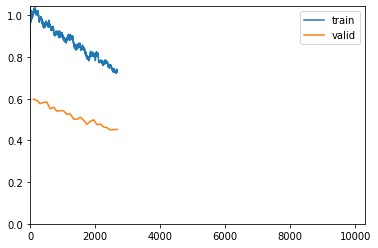

Better model found at epoch 1 with valid_loss value: 0.5921551585197449.
Better model found at epoch 2 with valid_loss value: 0.5761750936508179.
Better model found at epoch 5 with valid_loss value: 0.5507698059082031.
Better model found at epoch 7 with valid_loss value: 0.5403236150741577.
Better model found at epoch 10 with valid_loss value: 0.5248842835426331.
Better model found at epoch 12 with valid_loss value: 0.5028746724128723.
Better model found at epoch 13 with valid_loss value: 0.5012679696083069.
Better model found at epoch 15 with valid_loss value: 0.49669867753982544.
Better model found at epoch 16 with valid_loss value: 0.4772552251815796.
Better model found at epoch 19 with valid_loss value: 0.4752741754055023.
Better model found at epoch 21 with valid_loss value: 0.4642987847328186.
Better model found at epoch 22 with valid_loss value: 0.4607212543487549.
Better model found at epoch 23 with valid_loss value: 0.44983941316604614.
No improvement since epoch 23: early sto

In [10]:
learn.fine_tune(100,base_lr=1e-4)

In [11]:
path = Path('dataset/')
trainPath = path/'train'
testPath = path/'test'

In [12]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [13]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [14]:
learn.freeze()

In [15]:
learn.dls=dls512

In [14]:
#learn.load('hrnet')

SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.6309573650360107)

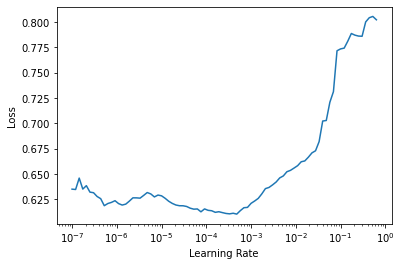

In [16]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.080475,0.808601,0.539755,0.523288,0.600629,00:15


Better model found at epoch 0 with valid_loss value: 0.8086010217666626.


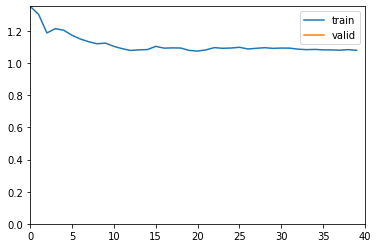

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.055502,0.813830,0.536697,0.520776,0.591195,00:18
1,1.063841,0.803244,0.555046,0.535620,0.638365,00:18
2,1.046348,0.799745,0.567278,0.547425,0.635220,00:18
3,1.042014,0.788791,0.565749,0.548571,0.603774,00:18
4,1.052007,0.805798,0.548930,0.531856,0.603774,00:18
5,1.051255,0.801178,0.551988,0.533333,0.628931,00:18
6,1.028272,0.786318,0.551988,0.532300,0.647799,00:18
7,1.038930,0.784583,0.547401,0.529891,0.613208,00:18
8,1.037248,0.781221,0.548930,0.529716,0.644654,00:18
9,1.030166,0.763456,0.565749,0.545699,0.638365,00:18


Better model found at epoch 0 with valid_loss value: 0.8138300776481628.


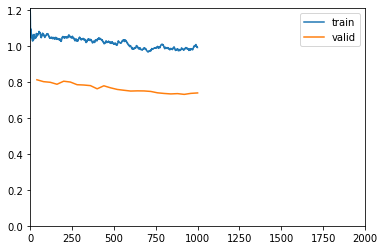

Better model found at epoch 1 with valid_loss value: 0.8032444715499878.
Better model found at epoch 2 with valid_loss value: 0.7997452616691589.
Better model found at epoch 3 with valid_loss value: 0.7887909412384033.
Better model found at epoch 6 with valid_loss value: 0.7863180637359619.
Better model found at epoch 7 with valid_loss value: 0.7845825552940369.
Better model found at epoch 8 with valid_loss value: 0.7812208533287048.
Better model found at epoch 9 with valid_loss value: 0.7634559869766235.
Better model found at epoch 12 with valid_loss value: 0.7599389553070068.
Better model found at epoch 13 with valid_loss value: 0.7553139925003052.
Better model found at epoch 14 with valid_loss value: 0.7509260773658752.
Better model found at epoch 17 with valid_loss value: 0.7487835884094238.
Better model found at epoch 18 with valid_loss value: 0.7411753535270691.
Better model found at epoch 19 with valid_loss value: 0.7375583052635193.
Better model found at epoch 20 with valid_los

In [16]:
learn.fine_tune(50,base_lr=1e-5)

In [17]:
learn.dls = dlsTest

In [18]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6075794696807861.


(#4) [nan,0.6075794696807861,0.6244541484716157,0.6574712643678161]